In [36]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np

xml_file = r"C:\Users\matte\Downloads\7557_output(1).xml"
tree = ET.parse(xml_file)
root = tree.getroot()
regions = []
markers = []
markers_x, markers_y, markers_z = [], [], []
x_points, y_points, z_points = [], [], []
for child in root:
    if 'name' in child.attrib.keys():
        region_name = child.attrib.get('name').replace(",", "").replace("-1", "").lower()
        subchildren = child.findall('{https://www.mbfbioscience.com/filespecification}point')
        if 'marker' in region_name.lower() or 'sectionoutline' in region_name.lower():
            markers += [region_name] * len(subchildren)
            for point in subchildren:
                markers_x.append(float(point.attrib.get('x')))
                markers_y.append(float(point.attrib.get('y')))
                markers_z.append(float(point.attrib.get('z')))
        else:
            regions += [region_name] * len(subchildren)
            for point in subchildren:
                x_points.append(float(point.attrib.get('x')))
                y_points.append(float(point.attrib.get('y')))
                z_points.append(float(point.attrib.get('z')))

#markers_df = pd.DataFrame({'Marker': markers, 'x': markers_x, 'y': markers_y, 'z':markers_z})
positions_df = pd.DataFrame({'Region Name': regions, 'x':x_points, 'y': y_points, 'z': z_points})
allen_csv = pd.read_csv(r"C:\Users\matte\Downloads\structure_tree_safe_2017.csv")
allen_csv['name'] = allen_csv['name'].apply(lambda x: x.lower())
allen_csv = allen_csv.loc[:, ['name', 'acronym', 'id']]
allen_csv.rename(columns={'name': 'Region Name'}, inplace=True)
positions_df = pd.merge(positions_df, allen_csv, on=['Region Name'])
positions_df

,Region Name,x,y,z,acronym,id
0,primary somatosensory area trunk layer 6a,6865.24,-1248.18,-6907.15,SSp-tr6a,9
1,primary somatosensory area trunk layer 6a,7234.09,-1352.37,-6824.53,SSp-tr6a,9
2,primary somatosensory area trunk layer 6a,7320.31,-1421.16,-6803.35,SSp-tr6a,9
3,primary somatosensory area trunk layer 6a,7389.58,-1422.49,-6794.16,SSp-tr6a,9
4,primary somatosensory area trunk layer 6a,7390.23,-1461.00,-6789.47,SSp-tr6a,9
...,...,...,...,...,...,...
271141,area prostriata,7868.39,-1903.57,-9706.42,APr,484682508
271142,area prostriata,7861.01,-1872.15,-9711.58,APr,484682508
271143,area prostriata,7844.00,-1926.56,-9716.47,APr,484682508
271144,area prostriata,7746.95,-1914.44,-9762.41,APr,484682508


In [ ]:
positions_df = pd.read_csv(r"C:\Users\matte\Downloads\7000_points.csv")
positions_df.dropna(inplace=True)
positions_df = positions_df.loc[['']]
#positions_df[positions_df['Marker'].str.]

,Marker,Experiment,Unnamed: 2,Unnamed: 3,Unnamed: 4,Channels,Unnamed: 6,Unnamed: 7,Atlas,Unnamed: 9,Unnamed: 10,Region,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,x,y,z,strength,channel DAPI,channel nNOS,channel GCaMP,x,y,z,name,acronym,id,hemisphere
1,Marker 19,6467.28,-3187.78,-1320,0.11,2781,9789,14812,2638.31,1470.7,7737.86,Rostrolateral area/ layer 5,VISrl5,312782616,right
2,Marker 19,6794.45,-3483.94,-1320,0.11,3314,10900,40674,3117.49,1016.1,7788.13,Primary visual area/ layer 4,VISp4,721,right
3,Marker 19,6807.28,-3796.14,-1320,0.11,1973,5253,16156,3575.15,958.741,7739.41,Anteromedial visual area/ layer 5,VISam5,433,right
4,Marker 19,6370.57,-3891.71,-1440,0.11,2402,10757,4484,3859.85,1625.43,7204.6,Field CA1,CA1,382,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Marker 19,6368.65,-7316.67,-3960,1,3552,9351,25702,8897.2,2776.78,9777.23,Entorhinal area/ medial part/ dorsal zone/ lay...,ENTm5,727,left
323,Marker 19,6464.02,-7683,-3960,1,3107,9890,51776,9336.86,2648.95,9926.58,Entorhinal area/ medial part/ dorsal zone/ lay...,ENTm5,727,left
324,Marker 19,6488.85,-7623.44,-3960,1,2208,8871,6331,9287.21,2621.56,9920.32,Entorhinal area/ medial part/ dorsal zone/ lay...,ENTm5,727,left
325,Marker 19,6436.28,-7682.46,-3960,1,2285,7875,7884,9324.03,2677.04,9916.58,Entorhinal area/ medial part/ dorsal zone/ lay...,ENTm5,727,left


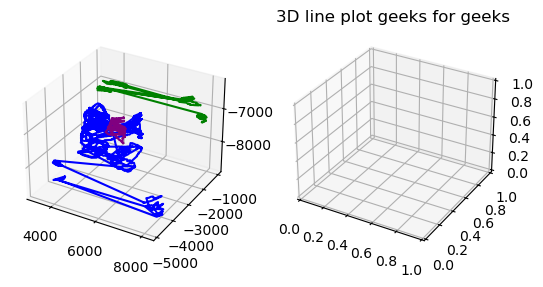

In [37]:
ss_area = positions_df[positions_df['Region Name'] == 'primary somatosensory area trunk layer 6a']
x, y, z = ss_area['x'].to_numpy(), ss_area['y'].to_numpy(), ss_area['z'].to_numpy()
ila_area =  positions_df[positions_df['Region Name'] == 'intralaminar nuclei of the dorsal thalamus']
x_1, y_1, z_1 = ila_area['x'].to_numpy(), ila_area['y'].to_numpy(), ila_area['z'].to_numpy()
pvn_area =  positions_df[positions_df['Region Name'] == 'paraventricular nucleus of the thalamus']
x_2, y_2, z_2 = pvn_area['x'].to_numpy(), pvn_area['y'].to_numpy(), pvn_area['z'].to_numpy()

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig, axs = plt.subplots(1, 2, subplot_kw=dict(projection="3d"))
 
# # syntax for 3-D projection
# axs[0, 0] = plt.axes(projection ='3d')
# axs[0, 1] = plt.axes(projection='3d')
# plotting
axs[0].plot(x, y, z, 'green')
axs[0].plot(x_1, y_1, z_1, 'blue')
axs[0].plot(x_2, y_2, z_2, 'purple')
plt.title('3D line plot geeks for geeks')
plt.show()

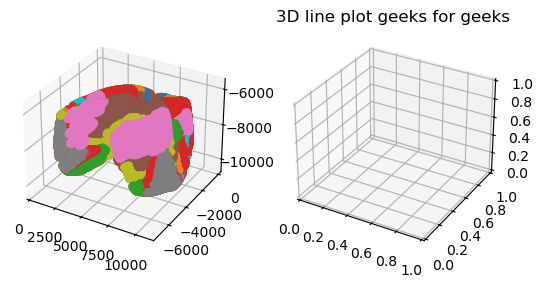

In [38]:
import random
def generate_random_hex_color():
    """Generates a random hex color code."""
    hex_color = '#' + ''.join([random.choice('0123456789abcdef') for j in range(10)])
    return hex_color
generate_random_hex_color()

fig, axs = plt.subplots(1, 2, subplot_kw=dict(projection="3d"))
positions_df.dropna(inplace=True)
for area in pd.unique(positions_df['Region Name']):
    area_points = positions_df[positions_df['Region Name'] == area]
    x, y, z = area_points['x'], area_points['y'], area_points['z']
    axs[0].scatter(x, y, z, generate_random_hex_color())

#axs[0].view_init(elevation=None, azim=1)
plt.title('3D line plot geeks for geeks')
plt.show()

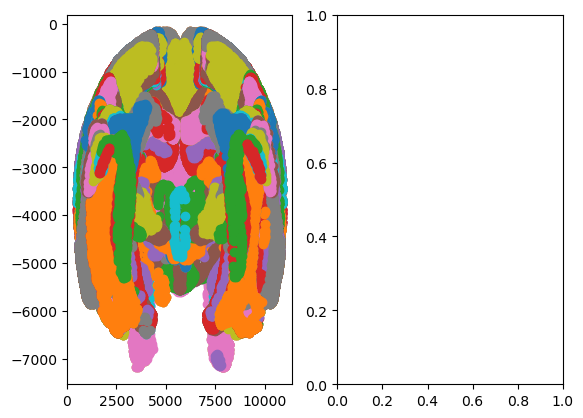

In [39]:
fig, axs = plt.subplots(1, 2)
positions_df.dropna(inplace=True)
for area in pd.unique(positions_df['Region Name']):
    area_points = positions_df[positions_df['Region Name'] == area]
    x, y = area_points['x'], area_points['y']
    axs[0].scatter(x, y)

In [40]:
# from scipy.spatial.distance import euclidean
# from scipy.spatial import ConvexHull

# regions = pd.unique(positions_df['acronym'])
# names = pd.unique(positions_df['Region Name'])
# volumes = []
# num_neurs = []
# def get_vol(points):
#     if len(points) >= 4:
#         hull = ConvexHull(points)
#         return hull.volume
#     return 0
# volumes  = []
# for region in names:
#     area_df = positions_df[positions_df['Region Name'] == region]
#     points = area_df.loc[:, 'x':'z'].to_numpy()
#     volumes.append(get_vol(points))
#     num_neurs.append(len(area_df))

# ### LATER: unit correct after density is calculated  
# SectionThicknessCorrection = 25
# um_per_cbum_to_mm_per_cb_mm = 1000**3/1000
# unit_correct = SectionThicknessCorrection * um_per_cbum_to_mm_per_cb_mm
# #densities = (np.array(num_neurs) / np.array(volumes)) / unit_correct
# densities = num_neurs
# #volumes = np.array(volumes) / unit_correct
# zipped_names = [f'{names[i]}: ({regions[i]})' for i in range(len(regions))] 
# #visual_region_vals = dict(zip(list(visual_areas), list(densities)))
# values = dict(zip(list(zipped_names), list(densities)))
# #acronym_vals = dict(zip(list(zipped_acronyms.keys()), list(zipped_acronyms.values())))
# #acronym_vals = dict(zip(list(regions), list(densities)))
# absolute_props = np.array(num_neurs) / len(positions_df)
# absolute_vals = dict(zip(list(zipped_names), list(absolute_props)))
# visual_areas = sorted([region for region in list(values.keys()) if 'visual' in region])
# absolute_visual_dict = {area:absolute_vals[area] for area in visual_areas}
# counts_df = positions_df.groupby(by='acronym').count()
# acronym_cell_counts = dict(zip(list(counts_df.index), list(counts_df['x'])))
# acronym_cell_counts

In [41]:
counts_df = positions_df.groupby(by='acronym', sort=False).count()
num_neurs = list(counts_df['x'])
prop_neurs = list(np.array(num_neurs) / len(positions_df))
regions, names = pd.unique(positions_df['Region Name']), list(pd.unique(positions_df['acronym']))
visual_areas = sorted([region for region in regions if 'visual' in region])
visual_acronyms = sorted(list(pd.unique(positions_df[positions_df['Region Name'].str.contains('visual')]['acronym'])))
zipped_names = [f'{regions[i]}: ({names[i]})' for i in range(len(regions))]
# cell_region_count = dict(zip(regions, num_neurs))
cell_count_dict = dict(zip(zipped_names, num_neurs))
cell_prop_dict = dict(zip(zipped_names, prop_neurs))
acronym_count_dict = dict(zip(names, num_neurs))
region_acronym_dict = dict(zip(regions, names))
visual_count_dict = dict(sorted({key:value for key, value in cell_count_dict.items() if 'visual' in key}.items()))
visual_prop_dict = dict(sorted({key:(value / visual_count_dict['visual areas: (VIS)']) for key, value in cell_count_dict.items() if 'visual' in key}.items()))
visual_acronym_count_dict = {acronym:float(counts_df.loc[acronym]['x']) for acronym in visual_acronyms}
visual_acronym_prop_dict = {acronym:float(float(counts_df.loc[acronym]['x']) / sum(visual_acronym_count_dict.values()) )for acronym in visual_acronyms}
#region_acronym_map = dict(zip(list(visual_acronyms['Region Name']), list(visual_acronyms['acronym'])))

In [42]:
visual_acronym_count_dict


{
    'VIS': 5041.0,
    'VISal': 703.0,
    'VISal1': 363.0,
    'VISal2/3': 409.0,
    'VISal4': 294.0,
    'VISal5': 324.0,
    'VISal6a': 234.0,
    'VISal6b': 122.0,
    'VISam': 549.0,
    'VISam1': 242.0,
    'VISam2/3': 290.0,
    'VISam4': 219.0,
    'VISam5': 280.0,
    'VISam6a': 163.0,
    'VISam6b': 94.0,
    'VISl': 728.0,
    'VISl1': 358.0,
    'VISl2/3': 341.0,
    'VISl4': 282.0,
    'VISl5': 337.0,
    'VISl6a': 264.0,
    'VISl6b': 201.0,
    'VISp': 2755.0,
    'VISp1': 2148.0,
    'VISp2/3': 2064.0,
    'VISp4': 1736.0,
    'VISp5': 1721.0,
    'VISp6a': 1424.0,
    'VISp6b': 971.0,
    'VISpl': 1002.0,
    'VISpl1': 419.0,
    'VISpl2/3': 451.0,
    'VISpl4': 317.0,
    ... +11
}

In [54]:
# normalize proportion values 
from sklearn.preprocessing import MinMaxScaler, minmax_scale

scaler = MinMaxScaler()
prop_vals = np.array(list(visual_acronym_prop_dict.values()))
min_prop, max_prop = min(prop_vals), max(prop_vals)
props_scaled = (prop_vals - min_prop) / (max_prop - min_prop)
#brainmap_propdict_norm = {area:float(props_scaled[idx]) for idx, area in enumerate(visual_acronyms)}
brainmap_countdict_norm = {area:float(np.array(list(visual_acronym_count_dict.values()))[idx]) for idx, area in enumerate(visual_acronyms)}
for area in names: 
    if area not in visual_acronyms:
        brainmap_countdict_norm[area] = 0
#del brainmap_propdict_norm['VIS']
# new_vals = scaler.fit(prop_vals)
# prop_vals_scaled = minmax_scale(prop_vals)
# prop_vals_scaled

In [44]:
# visual_areas = sorted([region for region in list(values.keys()) if 'visual' in region])
# visual_dict = {area:values[area] for area in visual_areas}
# absolute_visual_dict = {area:absolute_vals[area] for area in visual_areas}

# posits_regions_df = positions_df.loc[:, ['Region Name', 'acronym']]
# posits_regions_df[posits_regions_df['Region Name'].str.contains('visual')]['acronym']
# pd.unique(posits_regions_df[posits_regions_df['Region Name'].str.contains('visual')]['acronym'])

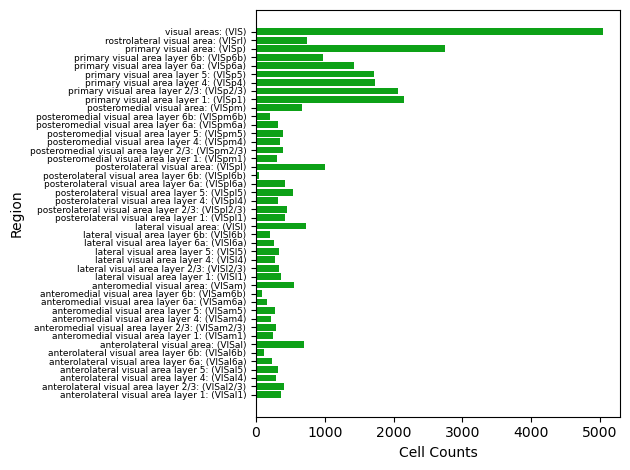

In [45]:
import matplotlib.pyplot as plt
plt.barh(list(visual_count_dict.keys()), list(visual_count_dict.values()), color='#0da117')
plt.yticks(fontsize = 6.5)
plt.xlabel('Cell Counts')
plt.ylabel('Region')
plt.tight_layout()

In [91]:
cell_count_dict['primary visual area layer 1: (VISp1)']

2148

TypeError: annotate() missing 2 required positional arguments: 'text' and 'xy'

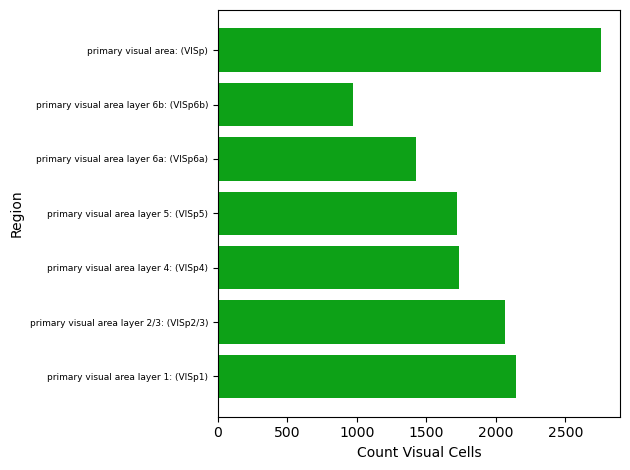

In [ ]:
primary_dict = {region:val for region, val in visual_count_dict.items() if 'primary visual area' in region}
plt.barh(list(primary_dict.keys()), list(primary_dict.values()), color='#0da117', )
plt.yticks(fontsize = 6.5)
plt.xlabel('Count Visual Cells')
plt.ylabel('Region')
plt.tight_layout()
plt.annotate()

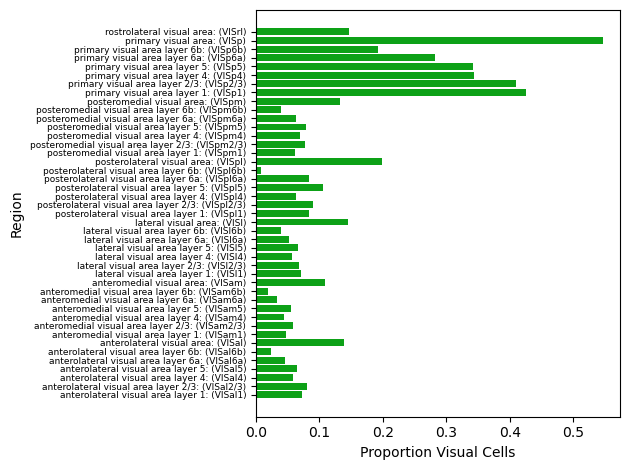

In [79]:
visual_prop_dict_bar = visual_prop_dict
del visual_prop_dict_bar['visual areas: (VIS)']
plt.barh(list(visual_prop_dict.keys()), list(visual_prop_dict.values()), color='#0da117')
plt.yticks(fontsize = 6.5)
plt.xlabel('Proportion Visual Cells')
plt.ylabel('Region')
plt.tight_layout()

In [47]:
from brainglobe_atlasapi import BrainGlobeAtlas
import brainglobe_heatmap as bgh
bg_atlas = BrainGlobeAtlas("allen_mouse_25um", check_latest=True)

In [60]:
brainmap_countdict_norm


{
    'VIS': 5041.0,
    'VISal': 703.0,
    'VISal1': 363.0,
    'VISal2/3': 409.0,
    'VISal4': 294.0,
    'VISal5': 324.0,
    'VISal6a': 234.0,
    'VISal6b': 122.0,
    'VISam': 549.0,
    'VISam1': 242.0,
    'VISam2/3': 290.0,
    'VISam4': 219.0,
    'VISam5': 280.0,
    'VISam6a': 163.0,
    'VISam6b': 94.0,
    'VISl': 728.0,
    'VISl1': 358.0,
    'VISl2/3': 341.0,
    'VISl4': 282.0,
    'VISl5': 337.0,
    'VISl6a': 264.0,
    'VISl6b': 201.0,
    'VISp': 2755.0,
    'VISp1': 2148.0,
    'VISp2/3': 2064.0,
    'VISp4': 1736.0,
    'VISp5': 1721.0,
    'VISp6a': 1424.0,
    'VISp6b': 971.0,
    'VISpl': 1002.0,
    'VISpl1': 419.0,
    'VISpl2/3': 451.0,
    'VISpl4': 317.0,
    ... +281
}

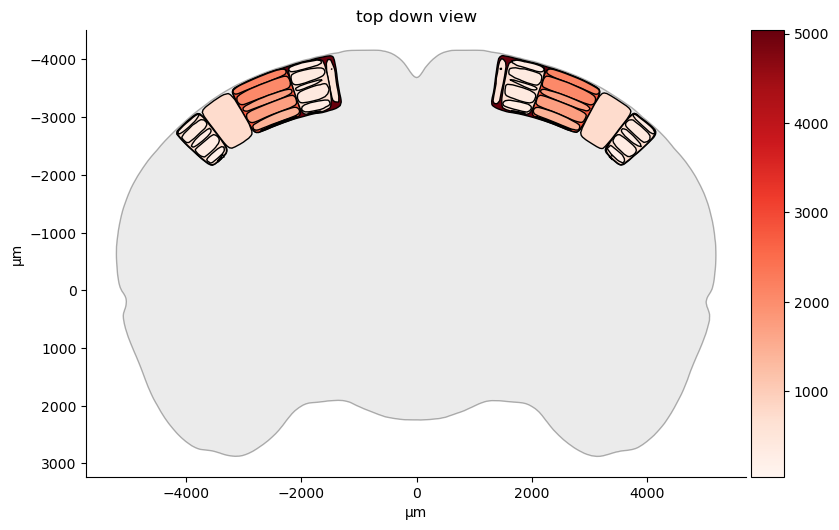

In [82]:
f = bgh.Heatmap(
    visual_acronym_count_dict,
    # when using a named orientation, you can pass a single value!
    position=8050,
    # 'frontal' or 'sagittal,' or 'horizontal' or a tuple (x,y,z)
    orientation="frontal",
    title="top down view",
    atlas_name="allen_mouse_25um",
    format="2D", 
    thickness=25
).show()

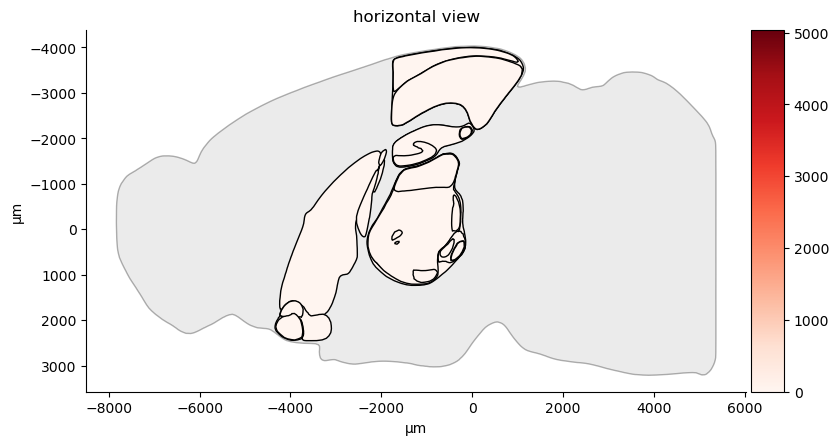

In [ ]:
f = bgh.Heatmap(
    brainmap_countdict_norm,
    # when using a named orientation, you can pass a single value!
    position=6000,
    # 'frontal' or 'sagittal,' or 'horizontal' or a tuple (x,y,z)
    orientation="sagittal",
    title="horizontal view",
    atlas_name="allen_mouse_25um",
    min = min(brainmap_countdict_norm.values()), 
    max = max(brainmap_countdict_norm.values()),
    format="2D"
).show()

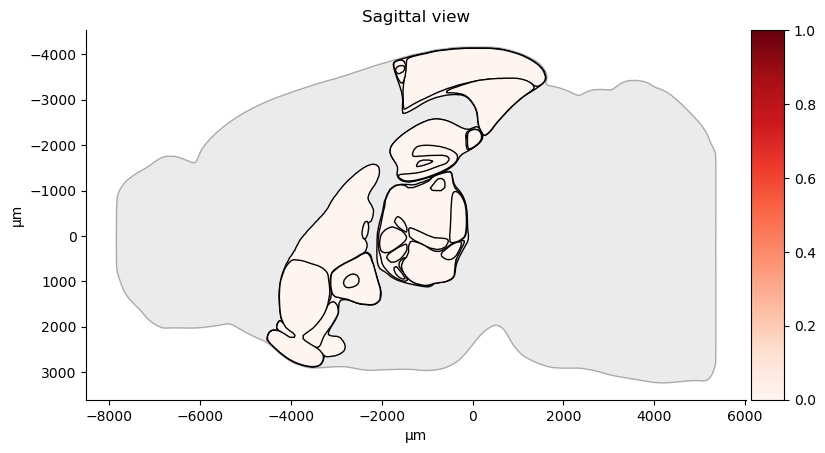

In [50]:
"""
This example shows how to use visualize a heatmap in 2D
"""

import brainglobe_heatmap as bgh
values = dict(VISam6b=-0.2, VISp=0.5,  VISl6b=0.2)

try:
    f = bgh.Heatmap(
        brainmap_propdict_norm,
        # when using a named orientation, you can pass a single value!
        position=5000,
        # 'frontal' or 'sagittal,' or 'horizontal' or a tuple (x,y,z)
        orientation="sagittal",
        title="Sagittal view",
        vmin=0,
        vmax=1,
        thickness=5000,
        atlas_name='allen_mouse_25um',
        format="2D").show()
except:
    f.savefig(r'C:\Users\matte\Downloads\density_script\sagittal.png')

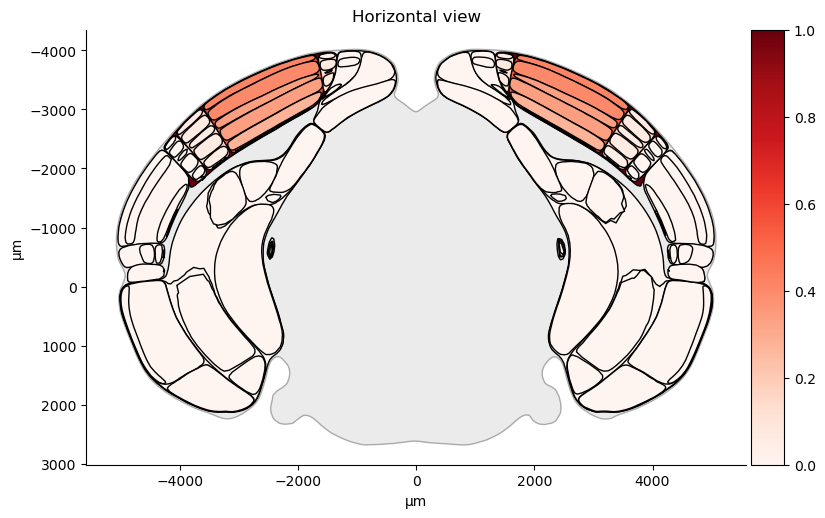

In [51]:
import brainglobe_heatmap as bgh

f = bgh.Heatmap(
    brainmap_propdict_norm,
    # when using a named orientation, you can pass a single value!
    position=9000,
    # 'frontal' or 'sagittal,' or 'horizontal' or a tuple (x,y,z)
    orientation="frontal",
    title="Horizontal view",
    vmin=0,
    vmax=1,
    atlas_name='allen_mouse_25um',
    format="2D"
).show()